# Part IV Project Statistical Hypothesis Testing

SUS survey ratings collected from a sample of 20 participants. Collected over a period of 3 weeks. After performance specific tasks, participants were asked to rate the usability of two prototype disaster news apps. The first app was a map interface and the second app was a newsfeed interface.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_rel

In [2]:
map_ratings = pd.read_csv("map.csv", header=None)
newsfeed_ratings = pd.read_csv("newsfeed.csv", header=None)

In [3]:
def compute_SUS(row):
    odd_scores = row.values[::2] - 1
    even_scores = 5 - row.values[1::2]
    return 2.5 * (odd_scores.sum() + even_scores.sum())

map_ratings["SUS_score"] = map_ratings.apply(compute_SUS, axis=1)
newsfeed_ratings["SUS_score"] = newsfeed_ratings.apply(compute_SUS, axis=1)

### Data Cleaning

Removed two outliers from the dataset rows `1` and `13` (index starts from `0`)

Row `1`: map SUS score was significantly lower than the rest of the dataset.

Row `13`: newsfeed SUS score was `100`, meaning perfect percieved usability, significantly greater than the rest of the dataset.

In [4]:
map_outlier = map_ratings.iloc[1]["SUS_score"]
newsfeed_outlier = newsfeed_ratings.iloc[13]["SUS_score"]
print(f"Map SUS score outlier: {map_outlier}")
print(f"Newsfeed SUS score outlier: {newsfeed_outlier}")

map_ratings.drop([1, 13], inplace=True)
newsfeed_ratings.drop([1, 13], inplace=True)

Map SUS score outlier: 50.0
Newsfeed SUS score outlier: 100.0


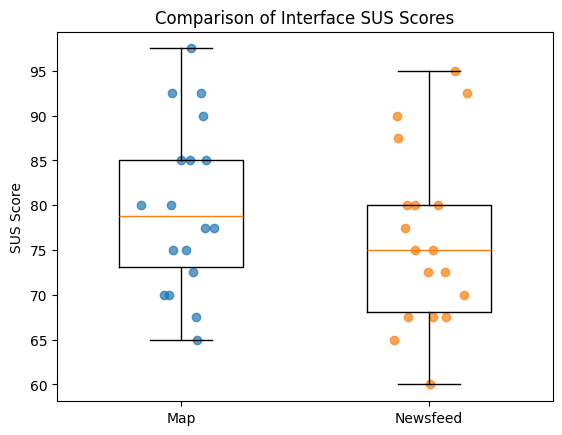

In [5]:
combined_data = [map_ratings['SUS_score'], newsfeed_ratings['SUS_score']]
plt.boxplot(combined_data, widths=0.5)
plt.xticks([1, 2], ["Map", "Newsfeed"])
plt.title("Comparison of Interface SUS Scores")
plt.ylabel("SUS Score")

for i, data_point in enumerate(combined_data, 1):
    x_positions = np.random.normal(i, 0.1, len(data_point))
    plt.scatter(x_positions, data_point, alpha=0.7)

plt.show()

In [6]:
map_scores = map_ratings['SUS_score'].tolist()
newsfeed_scores = newsfeed_ratings['SUS_score'].tolist()

### Normality Assumption

Test for normality using Shapiro-Wilk test yielded a pvalue of `0.168`. Also, through visual inspection indicates that the data is normally distributed. Therefore, parametric paired t-testing can commence.

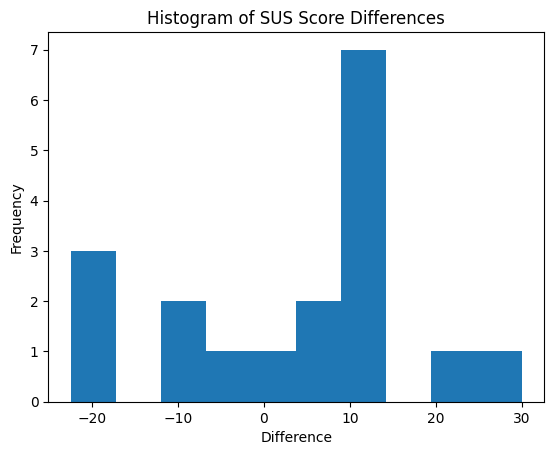

Shapiro-Wilk Test Statistic: 0.9264979362487793
P-value for Normality: 0.1684582680463791


In [7]:
differences = map_ratings['SUS_score'] - newsfeed_ratings['SUS_score']
plt.hist(differences)
plt.title("Histogram of SUS Score Differences")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

result = shapiro(differences)
print(f'Shapiro-Wilk Test Statistic: {result.statistic}')
print(f'P-value for Normality: {result.pvalue}')

### Hypothesis Testing

Participants are evaluating two different apps using the SUS (System Usability Scale) survey, Each participant provides two scores: one for each app. Therefore, we are dealing with paired or related samples.

The null hypothesis is that the mean difference between the two apps is zero. The alternative hypothesis is that the mean difference is not zero. 

We yielded a result of p > 0.05, failing to reject the null hypothesis. Therefore it doesn't prove the null hypothesis is true; it simply means that there's not enough evidence in your sample to conclude that an effect exists.

Future research should consider a larger sample size, longer testing period, ideally seperating the two SUS surveys into two different periods, as well as a more diverse sample population.

In [8]:
result = ttest_rel(map_scores, newsfeed_scores)
print(f"T-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

T-statistic: 1.0051214295511794
P-value: 0.3289315932963025
